In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error



# 1. Data Preprocessing:

* Load the dataset and focus on the 'Close' price column, as this will be
your target variable for prediction.

In [9]:
data = pd.read_csv('/content/HistoricalQuotes.csv')
data.head()


,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
print(data.columns)

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')


In [12]:
y = data[[' Close/Last']]

* Normalize the data (e.g., using Min-Max scaling to keep values between 0
and 1).

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(y)

scaled_data

array([[8.18942624e-01],
       [8.19480684e-01],
       [8.83812549e-01],
       ...,
       [2.30693463e-04],
       [0.00000000e+00],
       [6.72575693e-05]])

* Split the dataset into a training set (80%) and a testing set (20%).

In [14]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 2. Create Training Sequences:

* Convert the 'Close' prices into a series of sequences for training.
* Define a sequence length (e.g., 60 days), where each sequence will be
used to predict the stock price for the next day.

In [15]:
# Define sequence length
sequence_length = 60

# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# 3. Build the RNN Model:

* Define an RNN model with the following architecture:

 *  An RNN layer with 50 units
 * A Dense layer with 1 unit (for regression output)

* Use the mean squared error (MSE) loss function and the Adam optimizer.

In [16]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 4. Train the Model:

* Train the model on the training set for 50 epochs with a batch size of 32.
* Use validation data to check for overfitting.

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0148 - val_loss: 3.0746e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6376e-04 - val_loss: 4.8473e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9686e-04 - val_loss: 4.9915e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0698e-04 - val_loss: 3.8288e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0082e-04 - val_loss: 2.7191e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.6454e-04 - val_loss: 3.1941e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.9095e-04 - val_loss: 9.3404e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9869e-04 - val_loss: 3.1739e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7276e-04 - val_loss: 2.8007e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1156e-04 - val_loss: 3.3905e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.6105e-04 - 

# 5. Make Predictions:

* Predict the stock prices on the test set and transform the results back

In [22]:
predicted_prices = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
print("Predicted prices " ,predicted_prices)
print("Actual prices " ,actual_prices)



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted prices  [[54.591423]
 [53.73455 ]
 [53.395134]
 [51.871372]
 [51.9927  ]
 [53.0279  ]
 [53.11269 ]
 [52.723614]
 [53.1348  ]
 [54.211975]
 [55.13633 ]
 [54.522263]
 [54.54695 ]
 [55.33764 ]
 [55.624775]
 [57.871357]
 [57.2153  ]
 [57.156937]
 [57.66301 ]
 [57.062557]
 [56.953278]
 [57.66311 ]
 [57.579956]
 [58.28575 ]
 [57.58946 ]
 [57.33154 ]
 [57.406406]
 [56.66355 ]
 [56.284782]
 [56.899746]
 [58.719418]
 [59.820133]
 [60.07136 ]
 [58.918266]
 [58.001865]
 [57.594814]
 [56.60412 ]
 [54.332825]
 [53.902657]
 [53.929596]
 [52.95662 ]
 [53.2359  ]
 [53.951233]
 [54.594   ]
 [55.818806]
 [56.129883]
 [57.489334]
 [57.64326 ]
 [57.7937  ]
 [57.797176]
 [58.816467]
 [59.54389 ]
 [58.24284 ]
 [56.54464 ]
 [56.414074]
 [55.424175]
 [54.74476 ]
 [53.806183]
 [54.129814]
 [55.27184 ]
 [54.602085]
 [53.845802]
 [54.391483]
 [54.61943 ]
 [54.873737]
 [55.49848 ]
 [54.33571 ]
 [53.857483]
 [53.34464 ]
 [53.2306  ]
 [51.632534]
 [50.73716 ]
 [51.51

* Plot the predicted vs. actual stock prices to visualize the model’s

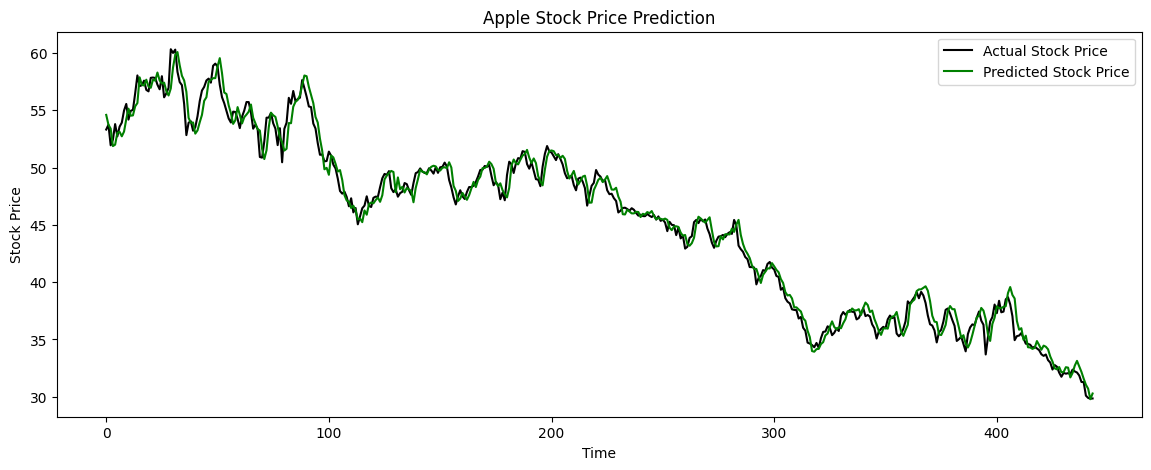

In [19]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color='black', label='Actual Stock Price')
plt.plot(predicted_prices, color='green', label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 6. Evaluation:

* Calculate the mean absolute error (MAE) and root mean squared error
(RMSE) on the test set.

In [20]:
# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.7257580322540559
Root Mean Squared Error (RMSE): 0.9568736062696593
